# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

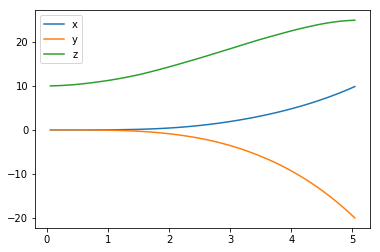

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

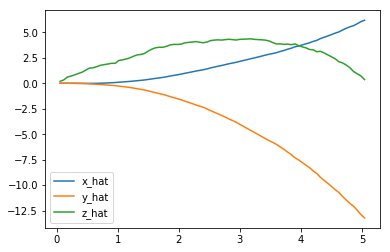

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

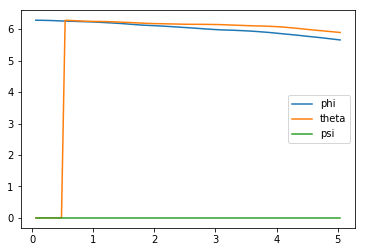

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

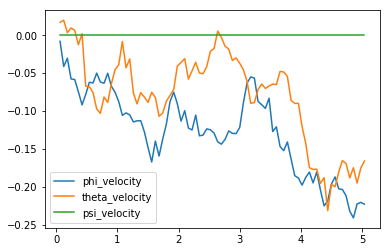

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

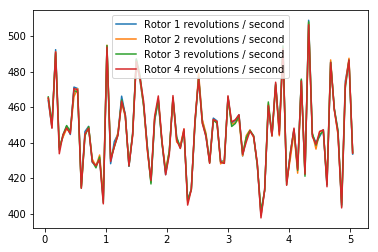

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[  9.84781556 -20.03493094  24.93410209   5.65721221   5.89457991   0.        ]
[  6.18153697 -13.2159492    0.35936093]
[-0.22300356 -0.16602638  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [13]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 10
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =   10, score =   4.587 (best =   4.587), noise_scale = 0.15

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [56]:
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
import pandas as pd
from agents.DDPG import DDPG
from task import Task
import csv
import copy

num_episodes = 1000
target_pos = np.array([10., 5., 20.])
init_pose = np.array([0., 0., 10., 1., 1., 1.])
task = Task(target_pos=target_pos, init_pose=init_pose, init_velocities = [0., 0., 10.0])
agent = DDPG(task)
labels = ['episode', 'reward']
results = {x : [] for x in labels}
file_output = 'data.txt' 
best_score = -100

runtime_labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity']
runtime_results = {x : [] for x in runtime_labels}
best_runtime_results = {x : [] for x in runtime_labels}

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    score = 0
    #while True:
    with open(file_output, 'w') as csvfile:
        writer = csv.writer(csvfile)
        while True:
            action = agent.act(state) 
            next_state, reward, done = task.step(action)
            agent.step(action, reward, next_state, done)
            state = next_state
            score += reward
            to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v)
            for ii in range(len(runtime_labels)):
                runtime_results[runtime_labels[ii]].append(to_write[ii])
                writer.writerow(to_write)
            if done:
                print("\rEpisode = {:4d}, score = {:7.3f}".format(
                    i_episode, score), end="")  # [debug]
                if score > best_score:
                    best_score = score
                    best_runtime_results = runtime_results.copy()
                break
    results['episode'].append(i_episode)
    results['reward'].append(score)
    sys.stdout.flush()
    if task.success:
        print('success')
    
#print('\n', results)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Episode = 1000, score = 122.2740

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

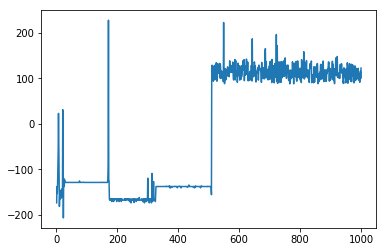

In [57]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['episode'], results['reward'])
plt.legend()
_ = plt.ylim()

### Plot of all runtime coordinate movement

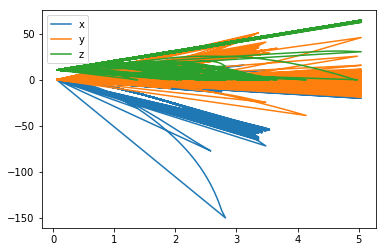

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(best_runtime_results['time'], best_runtime_results['x'], label='x')
plt.plot(best_runtime_results['time'], best_runtime_results['y'], label='y')
plt.plot(best_runtime_results['time'], best_runtime_results['z'], label='z')
plt.legend()
_ = plt.ylim()

### Analysis of an episode

The target position for the task is (10, 5, 20). The graph below shows a particular journey of the quadcopter towards that target.

In [59]:
#generating list of index start positions of episodes
new_episode_indicies = [i for i, x in enumerate(best_runtime_results['time']) if x == .06]
time_steps = len(best_runtime_results['time'])

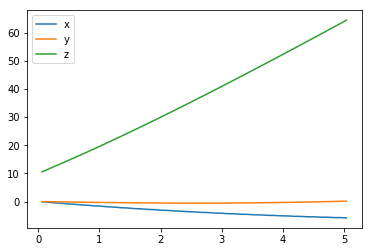

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

#setting index of episode to be plotted
ep_id = -2

plt.plot(best_runtime_results['time'][new_episode_indicies[ep_id]:new_episode_indicies[ep_id+1]], best_runtime_results['x'][new_episode_indicies[ep_id]:new_episode_indicies[ep_id+1]], label='x')
plt.plot(best_runtime_results['time'][new_episode_indicies[ep_id]:new_episode_indicies[ep_id+1]], best_runtime_results['y'][new_episode_indicies[ep_id]:new_episode_indicies[ep_id+1]], label='y')
plt.plot(best_runtime_results['time'][new_episode_indicies[ep_id]:new_episode_indicies[ep_id+1]], best_runtime_results['z'][new_episode_indicies[ep_id]:new_episode_indicies[ep_id+1]], label='z')
plt.legend()
_ = plt.ylim()

### Animations of last episodes

These graphs animate the last 10 episodes in each dimension.

#### z-axis

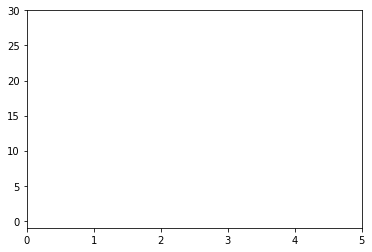

In [61]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()

ax.set_xlim(( 0, 5))
ax.set_ylim((-1, 30))

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

offset = 20
starting_episode = -10

def animate(i):
    x = best_runtime_results['time'][new_episode_indicies[starting_episode]+i:new_episode_indicies[starting_episode]+i+offset]
    y = best_runtime_results['z'][new_episode_indicies[starting_episode]+i:new_episode_indicies[starting_episode]+i+offset]
    line.set_data(x, y)
    return (line,)

frames = time_steps - new_episode_indicies[starting_episode] - offset

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=40, 
                               blit=True)

HTML(anim.to_html5_video())

#### y-axis

In [62]:
def animate(i):
    x = best_runtime_results['time'][new_episode_indicies[starting_episode]+i:new_episode_indicies[starting_episode]+i+offset]
    y = best_runtime_results['y'][new_episode_indicies[starting_episode]+i:new_episode_indicies[starting_episode]+i+offset]
    line.set_data(x, y)
    return (line,)

frames = time_steps - new_episode_indicies[starting_episode] - offset

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=40, 
                               blit=True)

HTML(anim.to_html5_video())

#### x-axis

In [63]:
def animate(i):
    x = best_runtime_results['time'][new_episode_indicies[starting_episode]+i:new_episode_indicies[starting_episode]+i+offset]
    y = best_runtime_results['x'][new_episode_indicies[starting_episode]+i:new_episode_indicies[starting_episode]+i+offset]
    line.set_data(x, y)
    return (line,)

frames = time_steps - new_episode_indicies[starting_episode] - offset

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=40, 
                               blit=True)

HTML(anim.to_html5_video())

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: The task I specified was to fly to a specified position. After much trial and error, I designed the reward function to have four components in sequence:
* Rewarding linear force that keeps the quadcopter flying. I used tanh to give it a positive reward for have an upward linear force and a negative reward for when the force of gravity x mass is greater. This gives incentive to the quadcopter to raise its height above the target height.
* Assuming the condition for the above reward is met, then reward the agent for linear force that moves in the correct y direction
* Then, following the above rewards, reward the agent based on the distance from the target.
* Lastly, the agent is given a large reward if it is within 1 meter of the target.

In summary, I decomposed the task into a sequence of tasks, essentially. First the agent must move sufficiently closer to the target on the z axis to get positive reward, then on the y axis it must move in the correct direction whille also staying above the target plane in the z axis, and then, once in the correct quadrant it is given reward based on distance.  With the task I chose, I felt that the algorithm performed better if I decomposed the task into parts in such a way. In a more sophisticated implementation, I could see building a takeoff task, hover task, move right while hovering task, etc. Then based on a current state, have it pick the appropriate task. Each task would need to be learned independently. I also believe that rewarding lower velocity might lead to better performance.

For my relatively simple implementation, I have the quadcopter getting different rewards in different stages of solving the problem. Since crashing is such a big problem, due to the force of gravity, I set a condition whereby the quadcopter only needs to learn to move up if the current height is less than the target height. After the quadcopter reaches the target height, as long as it stays above it, it is given an additional reward of tanh of the linear force in the y direction. Lastly, I used the distance based reward function: 2 + (1 - (distance/max_distance)^.04). This function approaches 1 as the distance approaches 0 and approaches 0 as the distance approaches the max_distance. The first term (1) in the equations for linear force on the y axis and (2) in the distance reward is to account for the maximum value of the reward function from the previous stage. This helps the reward function be a monotonic increasing function as the task goes from the takeoff stage to the navigate stage.

I tried more complicated reward functions, such as using a radial basis function instead of the distance function I used, but it seemed to perform more poorly. I believe that is because the positive reward was too small of a signal it to be considered more important than minimizing the negative reward it was accumulating. I also tried reward functions with no negative reward and tried to craft a series of positive behaviors I wanted to reinforce (such as taking the most direct path (the dot product of the current velocity and the target divided by the norm of each gives the cosine of their angle which happens to be a nice reward function concept)).

While I was able to make the quadcopter takeoff (and start getting a distance reward), (I was even able to get it to hit the target once), it seems that the DDPG was not able to solve my task.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
- What learning algorithm(s) did you try? What worked best for you?

I wanted to practice with the DDPG algorithm, which was provided as sample code in the module. 

- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?

$\tau$ = .01 which I used to stabalize the learning target. I tried higher values of $\tau$ and found that the network tended to oscillate, making convergence more difficult.

$\gamma$ = .99 which was also referenced as the parameter setting in the deepmind paper "Continuous Learning with Deep Control". I did try other settings such as .9 and even .8. Ultimately, it seemed to perform better with a higher discount of future reward since the action space is so unstable (small variations in propeller speed can lead to very different state spaces).

The noise process has two parameters which I set as follows: $\theta$ = .15 (the speed of the mean reversion) and $\sigma$ = .02  (the variance of the noise).

- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

The DDPG algorithm uses several neural networks:
* Actor neural network that learns a policy that maps states to actions. I experimented quite a bit with different architectures but ended up using one very similar to the default one provided in the sample code. There are 3 hidden layers with 20% dropout between them. Experiemented with deeper and smaller layers, but ended up sticking with the provided 32, 64, 32 node configuration for the hidden layers. I included dropout to help dead nodes and maximize its representational power. I beleive that the dropout also improved training time slightly. I did experiment with regularization but it was unclear if that was making a difference. For activation I used rectified linear units (relu) on the hidden layers and a sigmoid logistic function on the output layer. To help avoid local maxima I used adaptive momentum with the Adam optimizer in training. A copy architecture of the Actor network is created to track the Actor policy and provide target values, similar to supervised learning.
* Critic neural network that learns the state-action to value mapping.  The network architecture starts with building a reprerentation of the state-action spaces. For both the state and action sizes, each one has two fully connected (dense) hidden layers with 32 and 64 nodes respectively. Relu activation was used on these layers. Then the output of the state and action networks were combined and connected to an output layer. No activation was applied to the output since it directly represents q value approximations.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
- Was it an easy task to learn or hard?

This was a hard task to learn (at least I couldn't find a way for it to be an easy task for the agent to learn).

- Was there a gradual learning curve, or an aha moment?

The agent seemed to have aha moments and abruptly change its policy

- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

The final performance was not very good. The agent seemed to find that going straight up (taking off) was the optimal solution. It did not move in the y-axis like I would have expected. The average reward was about 110.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)

The hardest part was debugging the poor results that you inevitably get. It was difficult to know if the problem lied with the neural network architectures, the parameters of the DDPG, the noise parameters, the buffer or the reward function. For example, I tried modifying the buffer to give more weight to episodes with higher reward rather than uniformly randomly sampling. That drastically slowed down performance but didn't seem to have much of a difference which I don't quite understand why. Due to training times, it was difficult to iterate on this rapidly. 
- Did you find anything interesting in how the quadcopter or your agent behaved?

Yes, I found that the agent learned lower-level tasks faster, like learning how to control the rotors to not crash. Higher level tasks, like controlling its position have proven to be much more challenging. I was also very surprised that episodes with very high rewards would not get reinforced and would tend to be overpowered by all of the poor performing episodes until it seems like it forgot all about the high rewards possible. As mentioned above, I think one way to improve would be to develop different models for simple tasks and then develop another algorithm that decides which task to call for to get to a specified point.